In [1]:
import numpy as np 
import pandas as pd 

import os
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
df= pd.read_csv('age_gender.csv')
print(df.shape)
df.head()

(23705, 5)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

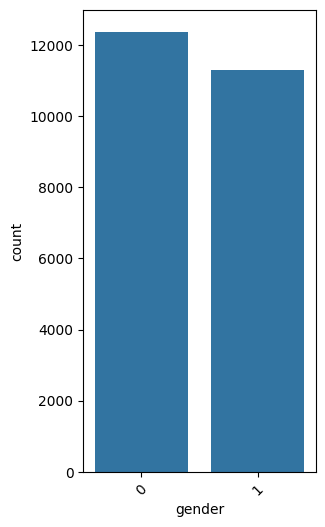

In [7]:
plt.figure(figsize=(3,6))
sns.countplot(data=df, x='gender')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

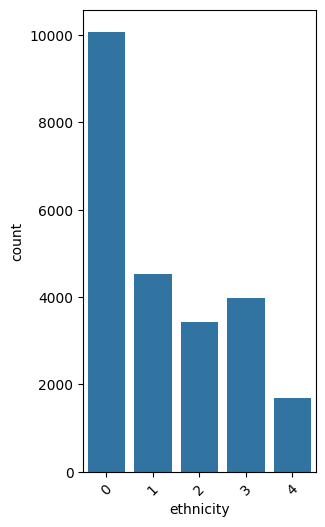

In [8]:
plt.figure(figsize=(3,6))
sns.countplot(data=df, x='ethnicity')
plt.xticks(rotation=45)

In [9]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [10]:
X = np.array(df['pixels'].tolist())
X.shape

(23705, 2304)

In [11]:
X= X.reshape(-1,48,48,1)

Text(0.5, 0, 'Age:1  Ethnicity:2  Gender:0')

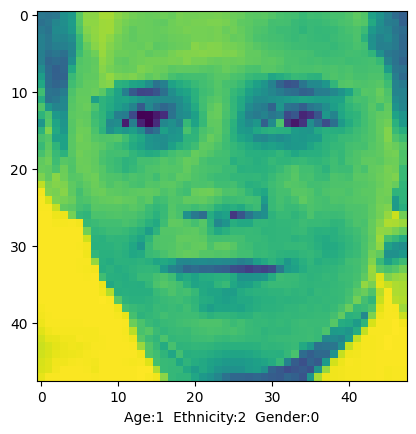

In [14]:
plt.imshow(X[1842])
plt.xlabel(
        "Age:"+str(df['age'].iloc[0])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[0])+
        "  Gender:"+ str(df['gender'].iloc[0])
    )

In [15]:
df["age"] = pd.cut(df["age"],bins=[0,5,20,40,65,116],labels=["0","1","2","3","4"])

In [16]:
from tensorflow.keras.utils import to_categorical
y= to_categorical(np.array(df['age']),num_classes=5)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [19]:
model_age=Sequential()
model_age.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(MaxPool2D(pool_size=(2,2)))
model_age.add(Flatten())

model_age.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model_age.add(Dropout(0.5))
model_age.add(Dense(5,activation='softmax'))

# sgd = tf.keras.optimizers.SGD(momentum=0.9)
model_age.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [22]:
epochs = 10 
batch_size = 64

history_age = model_age.fit(X_train, Y_train, batch_size=batch_size, epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/10
259/259 [==============================] - 31s 112ms/step - loss: 3.3887 - accuracy: 0.5954 - val_loss: 1.8430 - val_accuracy: 0.6348 - lr: 0.0010
Epoch 2/10
259/259 [==============================] - 29s 114ms/step - loss: 1.3594 - accuracy: 0.6854 - val_loss: 1.1973 - val_accuracy: 0.6753 - lr: 0.0010
Epoch 3/10
259/259 [==============================] - 29s 112ms/step - loss: 1.0228 - accuracy: 0.7057 - val_loss: 0.9368 - val_accuracy: 0.7238 - lr: 0.0010
Epoch 4/10
259/259 [==============================] - 30s 114ms/step - loss: 0.9050 - accuracy: 0.7222 - val_loss: 1.1428 - val_accuracy: 0.5951 - lr: 0.0010
Epoch 5/10
259/259 [==============================] - 28s 109ms/step - loss: 0.8544 - accuracy: 0.7339 - val_loss: 0.8588 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 6/10
259/259 [==============================] - 30s 118ms/step - loss: 0.8195 - accuracy: 0.7457 - val_loss: 0.8684 - val_accuracy: 0.7217 - lr: 0.0010
Epoch 7/10
259/259 [==============================] 

In [25]:
loss, acc = model_age.evaluate(X_test, Y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.7969075441360474
Test Accuracy: 0.7515466809272766
